In [5]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [13]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[4]])
print(decoded_newswire)

? seton co said its board has received a proposal from chairman and chief executive officer philip d ? to acquire seton for 15 75 dlrs per share in cash seton said the acquisition bid is subject to ? arranging the necessary financing it said he intends to ask other members of senior management to participate the company said ? owns 30 pct of seton stock and other management members another 7 5 pct seton said it has formed an independent board committee to consider the offer and has deferred the annual meeting it had scheduled for march 31 reuter 3


In [8]:
train_labels[10]

3

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [17]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [25]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [26]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [28]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 262us/step - loss: 2.2840 - accuracy: 0.5016 - val_loss: 1.4766 - val_accuracy: 0.6630
Epoch 2/20
7982/7982 [==============================] - 2s 222us/step - loss: 1.2055 - accuracy: 0.7261 - val_loss: 1.1441 - val_accuracy: 0.7420
Epoch 3/20
7982/7982 [==============================] - 2s 227us/step - loss: 0.8686 - accuracy: 0.8012 - val_loss: 1.1346 - val_accuracy: 0.7410
Epoch 4/20
7982/7982 [==============================] - 2s 219us/step - loss: 0.6273 - accuracy: 0.8543 - val_loss: 1.0008 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 2s 222us/step - loss: 0.4603 - accuracy: 0.8970 - val_loss: 0.9270 - val_accuracy: 0.8070
Epoch 6/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.3340 - accuracy: 0.9271 - val_loss: 1.0263 - val_accuracy: 0.7890
Epoch 7/20
7982/7982 [==============================] - 2s 226us/step - loss

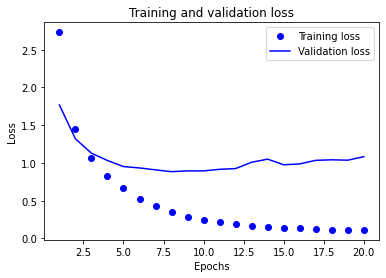

In [22]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 220us/step - loss: 2.6136 - accuracy: 0.5371 - val_loss: 1.7157 - val_accuracy: 0.6370
Epoch 2/9
7982/7982 [==============================] - 2s 209us/step - loss: 1.4013 - accuracy: 0.7108 - val_loss: 1.2860 - val_accuracy: 0.7260
Epoch 3/9
7982/7982 [==============================] - 1s 176us/step - loss: 1.0286 - accuracy: 0.7833 - val_loss: 1.1174 - val_accuracy: 0.7490
Epoch 4/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.8071 - accuracy: 0.8275 - val_loss: 1.0093 - val_accuracy: 0.7870
Epoch 5/9
7982/7982 [==============================] - 1s 184us/step - loss: 0.6385 - accuracy: 0.8656 - val_loss: 0.9519 - val_accuracy: 0.8040
Epoch 6/9
7982/7982 [==============================] - 1s 181us/step - loss: 0.5086 - accuracy: 0.8939 - val_loss: 0.9015 - val_accuracy: 0.8110
Epoch 7/9
7982/7982 [==============================] - 2s 227us/step - loss: 0.411